In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [177]:
import networkx as nx
import random

MIN_PER_RANK = 1  # Nodes/Rank: How 'fat' the DAG should be.
MAX_PER_RANK = 5
MIN_RANKS = 3     # Ranks: How 'tall' the DAG should be.
MAX_RANKS = 5
PERCENT = 30      # Chance of having an Edge.

def generate_dag(min_w, max_w, total_nodes):
    random.seed()  # Initialize the random number generator

    G = nx.DiGraph()

    current_nodes = 0
    ranks = []

    # Generate ranks with nodes until the total number of nodes is reached
    while current_nodes < total_nodes:
        new_nodes = min(MAX_PER_RANK, total_nodes - current_nodes)
        ranks.append(new_nodes)
        current_nodes += new_nodes

    nodes = 0

    for rank in ranks:
        for k in range(rank):
            # Assign a random weight to each new node
            node_weight = random.randint(min_w, max_w)
            G.add_node(nodes + k, weight=node_weight)

        # Edges from old nodes ('nodes') to new ones ('rank').
        for j in range(nodes):
            for k in range(rank):
                if random.randint(0, 99) < PERCENT:
                    G.add_edge(j, k + nodes)

        nodes += rank  # Accumulate into old node set.

    # remove isolated nodes
    G.remove_nodes_from(list(nx.isolates(G)))

    root_id = G.number_of_nodes() + 1

    roots = [node for node in G.nodes() if G.in_degree(node) == 0]
    for _ in roots:
        G.add_edge(root_id, _)

    for node in G.nodes():
        G.nodes[node]['ranges'] = [(0,0)]

    return G

In [179]:
G = generate_dag(1, 10, 20)

TypeError: 'tuple' object is not callable

In [155]:
topological_order = list(nx.topological_sort(G))
print(topological_order)

[21, 0, 1, 2, 3, 4, 5, 8, 9, 7, 6, 11, 10, 13, 14, 12, 18, 17, 19, 15, 16]


In [171]:
def merge_ranges_and_remove_none(ranges):
    # Merge overlapping and contiguous ranges
    sorted_ranges = sorted(ranges, key = lambda x: x[0])
    merged_ranges = [sorted_ranges[0]]
    for current_range in sorted_ranges[1:]:
        if current_range[0] <= merged_ranges[-1][1] + 1:
            merged_ranges[-1] = (merged_ranges[-1][0], max(merged_ranges[-1][1], current_range[1]))
        else:
            merged_ranges.append(current_range)

    # Remove None ranges
    cleaned_ranges = [current_range for current_range in merged_ranges if current_range[0] != 0 or current_range[1] != 0]

    return cleaned_ranges

for node in topological_order:
    predecessors = list(G.predecessors(node))

    if len(predecessors) == 0:
        continue

    # Create the list of ranges for the current node
    for predecessor in predecessors:
        for predecessor_range in G.nodes[predecessor]['ranges']:
            # Add a range to the current node
            G.nodes[node]['ranges'].append((predecessor_range[1] + 1, predecessor_range[1] + G.nodes[node]['weight']))

    G.nodes[node]['ranges'] = merge_ranges_and_remove_none(G.nodes[node]['ranges'])

print("\nRanges of the nodes in the graph are: ")
for node in G.nodes():
    print("Node: ", node)
    for node_range in G.nodes[node]['ranges']:
        print("\tRange: ", node_range)


Ranges of the nodes in the graph are: 
Node:  0
	Range:  (1, 7)
Node:  1
	Range:  (1, 8)
Node:  2
	Range:  (1, 6)
Node:  3
	Range:  (1, 10)
Node:  4
	Range:  (1, 6)
Node:  5
	Range:  (1, 10)
Node:  6
	Range:  (1, 4)
	Range:  (7, 11)
Node:  7
	Range:  (1, 1)
	Range:  (11, 11)
Node:  8
	Range:  (1, 2)
	Range:  (9, 10)
Node:  9
	Range:  (1, 18)
Node:  10
	Range:  (1, 3)
	Range:  (8, 13)
Node:  11
	Range:  (1, 14)
Node:  12
	Range:  (1, 17)
	Range:  (19, 24)
Node:  13
	Range:  (1, 20)
Node:  14
	Range:  (1, 5)
	Range:  (8, 13)
Node:  15
	Range:  (1, 31)
Node:  16
	Range:  (1, 30)
Node:  17
	Range:  (1, 15)
	Range:  (21, 24)
Node:  18
	Range:  (1, 9)
	Range:  (11, 16)
Node:  19
	Range:  (1, 3)
	Range:  (6, 17)
Node:  21
	Range:  (0, 0)


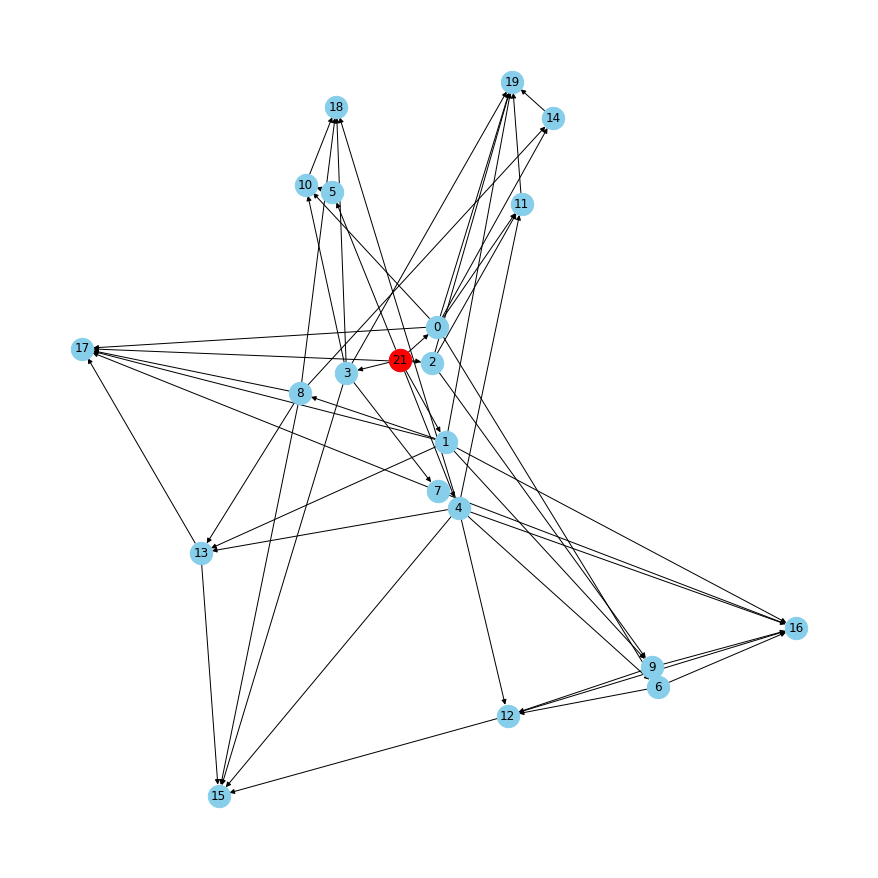

In [170]:
# draw the graph with a lot of repulsion
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue')
# colour red the root nodes
roots = [node for node in G.nodes() if G.in_degree(node) == 0]
nx.draw_networkx_nodes(G, pos, nodelist=roots, node_color='red', node_size=500)

plt.show()

In [ ]:
# check how may roots there are in the graph
roots = [node for node in G.nodes if G.in_degree(node) == 0]
print("Roots: ", roots)